In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [85]:
data = pd.read_csv("Netflix.csv", encoding = 'unicode_escape')
data.shape

(2500, 10)

In [86]:
data.head(3)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [88]:
pd.isnull(data)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [89]:
pd.isnull(data).sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [29]:
data.dropna(inplace = True) # to delete null values

In [90]:
data.shape

(2500, 10)

In [91]:
data.columns # this will show all columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [92]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [93]:
data[['Monthly Revenue', 'Age']].describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


In [35]:
# Exploratory Data Analysis

In [100]:
# Subscription Count

In [101]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

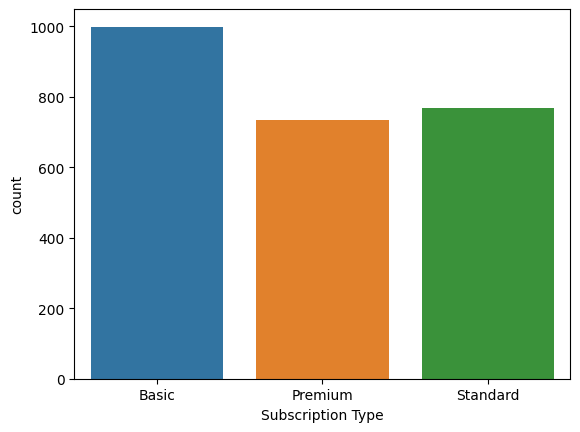

In [102]:
od = sns.countplot(x = 'Subscription Type', data = data )

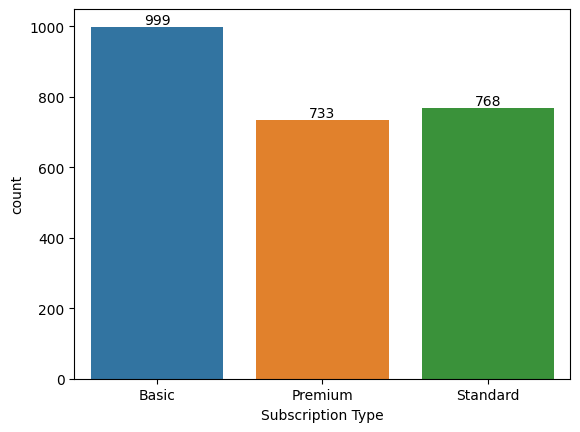

In [103]:
od = sns.countplot(x = 'Subscription Type', data = data )

for bars in od.containers:
    od.bar_label(bars)

<Axes: xlabel='Monthly Revenue', ylabel='Country'>

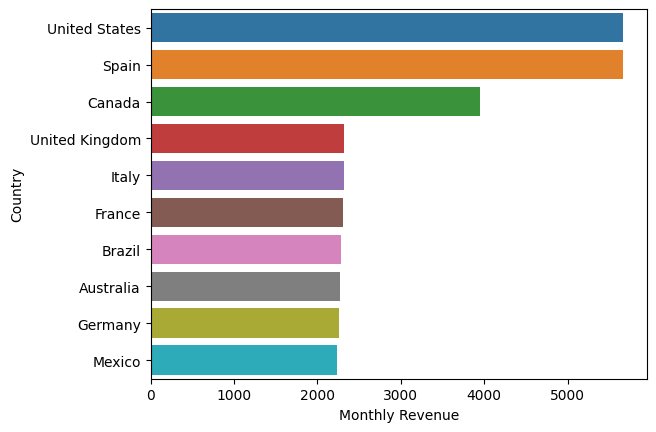

In [106]:
oo_data = data.groupby(['Country'], as_index = False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending = False)
sns.barplot(x = 'Monthly Revenue', y = 'Country', data = oo_data )

In [65]:
# from the above visualization we can conclude that USA is consuming a majority part of Netflix

In [108]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [121]:
# Gender Wise Subscription

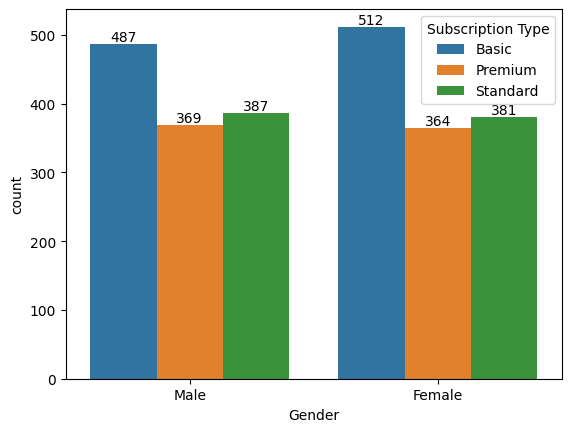

In [126]:
ag = sns.countplot(data = data, x = 'Gender', hue = 'Subscription Type')


for bars in ag.containers:
    ag.bar_label(bars)

In [127]:
# Monthly Revenue vs Age Groups

<Axes: xlabel='Age', ylabel='Monthly Revenue'>

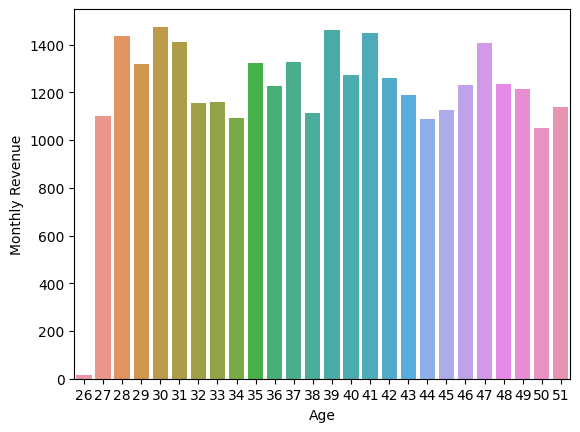

In [129]:
am_data = data.groupby(['Age'], as_index = False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending = False)
sns.barplot(x = 'Age', y = 'Monthly Revenue', data = am_data )

In [131]:
# the above data shows that most buyers are aged from 27 - 29 and 38 - 41 and majority of them are female

In [132]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Monthly Revenue'>

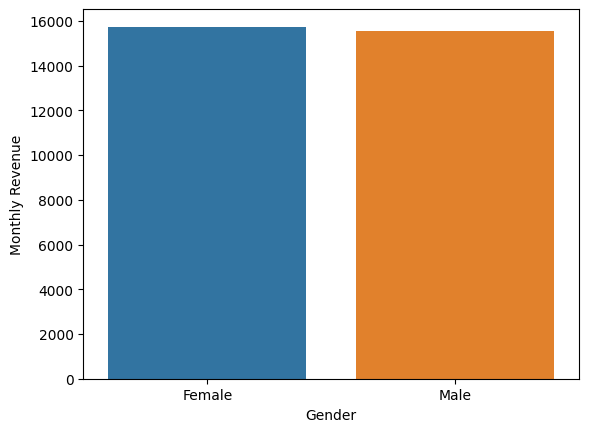

In [139]:
am = data.groupby(['Gender'], as_index = False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending = False)
sns.barplot(x = 'Gender', y = 'Monthly Revenue', data = am )

<Axes: xlabel='Country', ylabel='Monthly Revenue'>

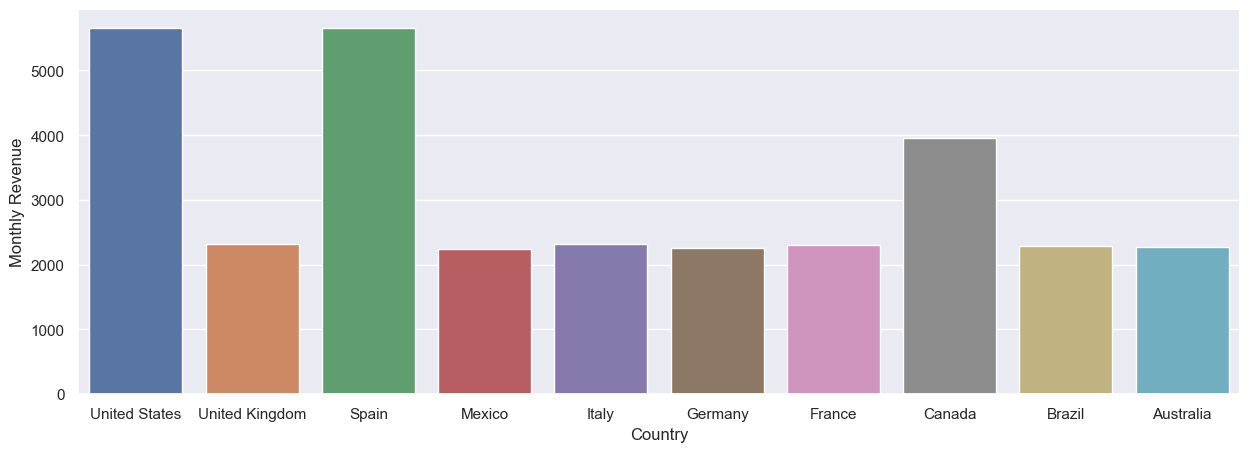

In [141]:
country_sales = data.groupby(['Country'], as_index = False)['Monthly Revenue'].sum().sort_values(by = 'Country', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = country_sales, x = 'Country', y = 'Monthly Revenue')

In [142]:
# Age vs Subscription